In [1]:
import pandas as pd
import pylab as plt
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

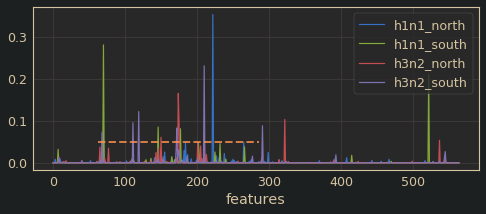

In [2]:
fig=plt.figure(figsize=[8,3])
ax=plt.gca()
df1=pd.read_csv('./north_h1n1_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'h1n1_north'})
df2=pd.read_csv('./south_h1n1_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'h1n1_south'})
df3=pd.read_csv('./north_h3n2_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'h3n2_north'})
df4=pd.read_csv('./south_h3n2_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'h3n2_south'})
df=df1.join(df2,lsuffix='north',rsuffix='south').join(df3,rsuffix='northh3n2').join(df4,rsuffix='southh3n2')
df=df/df.sum()
df.plot(ax=ax,logy=False)

plt.plot([63,286],[.05,0.05],'--y',lw=2,alpha=.8)

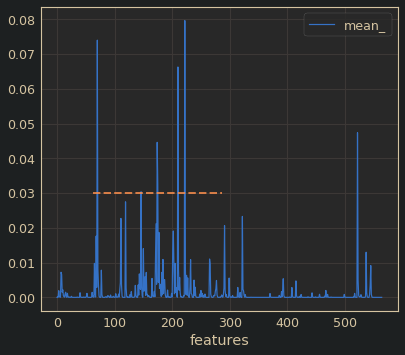

In [3]:
mf=pd.DataFrame(df.mean(axis=1).ewm(alpha=.9).mean(),columns=['mean_'])
mf.plot()
plt.plot([63,286],[.03,0.03],'--y',lw=2,alpha=.8)

In [4]:
dfs=df.join(mf)

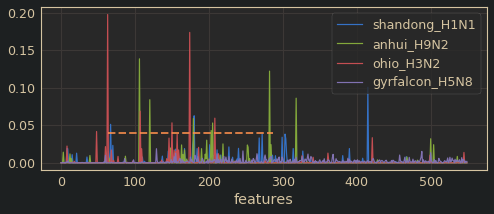

In [5]:
fig=plt.figure(figsize=[8,3])
ax=plt.gca()
df1=pd.read_csv('./A:swine:Shandong:1207:2016_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'shandong_H1N1'})
df2=pd.read_csv('./A:Anhui-Lujiang:39:2018_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'anhui_H9N2'})
df3=pd.read_csv('./A:Ohio:13:2017_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'ohio_H3N2'})
df4=pd.read_csv('./A:gyrfalcon:Washington:41088:2014_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'gyrfalcon_H5N8'})
df=df1.join(df2,lsuffix='north',rsuffix='south').join(df3,rsuffix='northh3n2').join(df4,rsuffix='southh3n2')
df=df/df.sum()
df.plot(ax=ax,logy=False)
plt.plot([63,286],[.04,0.04],'--y',lw=2,alpha=.8)

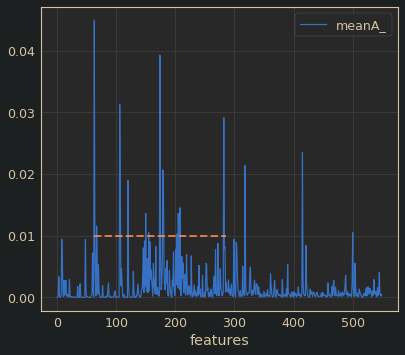

In [6]:
mfa=pd.DataFrame(df.mean(axis=1).ewm(alpha=.9).mean(),columns=['meanA_'])
mfa.plot()
plt.plot([63,286],[.01,0.01],'--y',lw=2,alpha=.8)

In [23]:
DF=df.join(mfa).join(dfs)
DF.to_csv('../../tex/overleaf/Figures/allshap.csv')

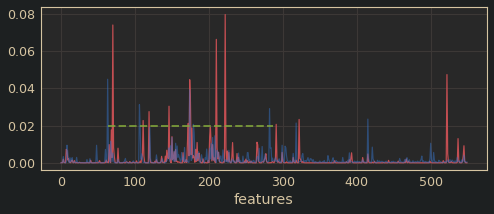

In [8]:
fig=plt.figure(figsize=[8,3])
ax=plt.gca()
ax=DF.mean_.plot(color='r',ax=ax)
ax=DF.meanA_.plot(ax=ax,alpha=.5)
#ax.set_ylim(0,0.001)
plt.plot([63,286],[.02,0.02],'--g',lw=2,alpha=.8)

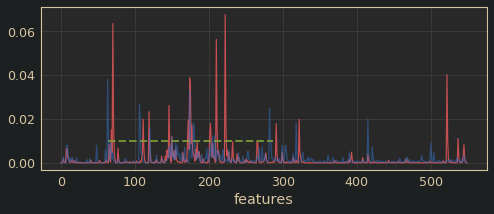

In [9]:
fig=plt.figure(figsize=[8,3])
ax=plt.gca()
ax=DF.mean_.ewm(alpha=.85).mean().plot(color='r',ax=ax)
ax=DF.meanA_.ewm(alpha=.85).mean().plot(ax=ax,alpha=.5)
#ax.set_ylim(0,0.001)
plt.plot([63,286],[.01,0.01],'--g',lw=2,alpha=.8)

In [10]:
' '.join(list(DF[DF.mean_>0.01].mean_.index.values.astype(str)))

'68 70 111 119 146 150 171 172 174 175 177 184 201 202 210 222 232 265 291 322 522 537'

In [11]:
' '.join(list(DF[DF.mean_.between(0.0075,0.01)].mean_.index.values.astype(str)))

'65 71 77 203 205 211 223 266 545'

In [12]:
' '.join(list(DF[DF.meanA_>0.01].meanA_.index.values.astype(str)))

'63 67 106 107 120 150 155 174 179 180 203 205 208 282 318 415 500'

In [13]:
' '.join(list(DF[DF.meanA_.between(0.0075,0.01)].meanA_.index.values.astype(str)))

'8 48 64 146 148 157 167 201 268 272 283 284 299 303 304 421'

In [14]:
DF.corr()

,shandong_H1N1,anhui_H9N2,ohio_H3N2,gyrfalcon_H5N8,meanA_,h1n1_north,h1n1_south,h3n2_north,h3n2_south,mean_
shandong_H1N1,1.000000,0.026943,-0.001810,0.045438,0.433055,0.063903,0.134414,0.025000,-0.012159,0.109790
anhui_H9N2,0.026943,1.000000,-0.021877,0.048206,0.573425,-0.002353,-0.003909,0.015069,-0.017242,-0.001067
ohio_H3N2,-0.001810,-0.021877,1.000000,-0.012758,0.669640,-0.003254,0.009542,0.449995,0.072435,0.193859
gyrfalcon_H5N8,0.045438,0.048206,-0.012758,1.000000,0.181330,0.062222,-0.011033,0.000973,-0.027412,0.027173
meanA_,0.433055,0.573425,0.669640,0.181330,1.000000,0.029593,0.055289,0.338453,0.035745,0.186648
h1n1_north,0.063903,-0.002353,-0.003254,0.062222,0.029593,1.000000,0.099716,-0.011355,-0.007257,0.550326
h1n1_south,0.134414,-0.003909,0.009542,-0.011033,0.055289,0.099716,1.000000,0.013991,-0.006415,0.574501
h3n2_north,0.025000,0.015069,0.449995,0.000973,0.338453,-0.011355,0.013991,1.000000,0.297711,0.493075
h3n2_south,-0.012159,-0.017242,0.072435,-0.027412,0.035745,-0.007257,-0.006415,0.297711,1.000000,0.536371
mean_,0.109790,-0.001067,0.193859,0.027173,0.186648,0.550326,0.574501,0.493075,0.536371,1.000000


In [15]:
import seaborn as sns

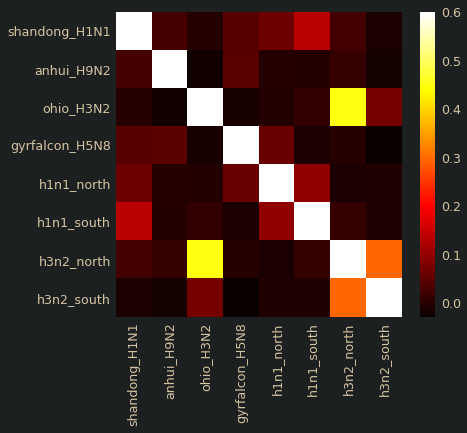

In [20]:
sns.heatmap(DF.drop(['mean_','meanA_'],axis=1).corr(),cmap='hot',vmax=.6)

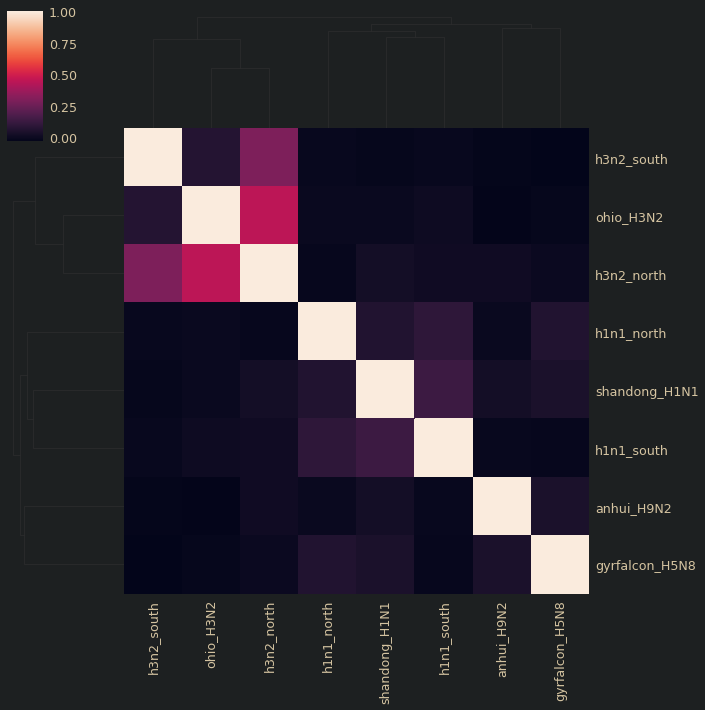

In [21]:
sns.clustermap(DF.drop(['mean_','meanA_'],axis=1).corr())

In [22]:
DF

,shandong_H1N1,anhui_H9N2,ohio_H3N2,gyrfalcon_H5N8,meanA_,h1n1_north,h1n1_south,h3n2_north,h3n2_south,mean_
features,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000
1,0.000337,0.000000,0.000019,0.000000,0.000081,0.000812,0.0,0.000000,5.521926e-06,0.000186
2,0.000065,0.000000,0.000170,0.000400,0.000151,0.000132,0.0,0.000000,0.000000e+00,0.000048
3,0.000471,0.014157,0.000169,0.000000,0.003345,0.008498,0.0,0.000000,2.440276e-07,0.001917
4,0.000000,0.000000,0.000000,0.000092,0.000355,0.000000,0.0,0.000000,0.000000e+00,0.000192
...,...,...,...,...,...,...,...,...,...,...
545,0.000000,0.000000,0.013813,0.003730,0.004056,0.000000,0.0,0.012291,2.675302e-02,0.009142
546,0.000000,0.000000,0.000000,0.000233,0.000458,0.000000,0.0,0.000000,0.000000e+00,0.000914
547,0.000000,0.000000,0.000000,0.002094,0.000517,0.000000,0.0,0.000000,0.000000e+00,0.000091
